In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

In [2]:
# Carpeta que contiene las imágenes
folder = 'images_land'
# Número de pares de imágenes
num_pairs = 4  

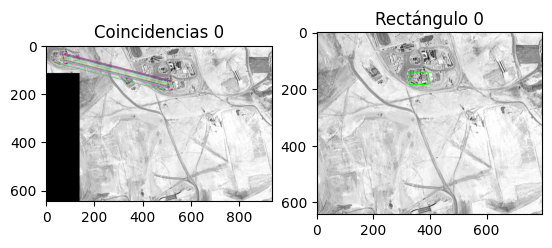

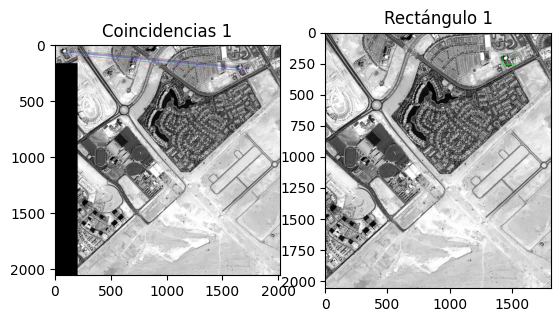

No se encontraron suficientes coincidencias válidas en src2.jpg


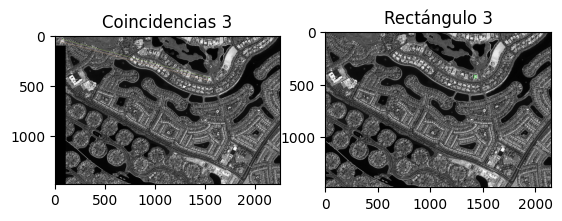

In [3]:
# Iniciar el detector ORB 
orb = cv.ORB_create(nfeatures=2000)

for i in range(num_pairs):
    # Leer las imágenes en escala de grises
    img1 = cv.imread(os.path.join(folder, f'land{i}.jpg'), cv.IMREAD_GRAYSCALE)  # queryImage
    img2 = cv.imread(os.path.join(folder, f'src{i}.jpg'), cv.IMREAD_GRAYSCALE)  # trainImage

    
    if img1 is None or img2 is None:
        print(f'Error al cargar land{i}.jpg o src{i}.jpg')
        continue

    # Puntos clave y descriptores con ORB
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    # Crear el objeto BFMatcher
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

    # Coincidir descriptores
    matches = bf.match(des1, des2)

    # Filtrar coincidencias por un umbral de distancia
    threshold_distance = 30  # Umbral de distancia
    good_matches = [m for m in matches if m.distance < threshold_distance]

    # Ordenar las coincidencias por su distancia
    good_matches = sorted(good_matches, key=lambda x: x.distance)[:50]  # Usar las 50 mejores coincidencias

    # Dibujar las primeras 30 coincidencias
    img3 = cv.drawMatches(img1, kp1, img2, kp2, good_matches[:30], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Obtener las coordenadas de los puntos clave coincidentes
    points = np.array([kp2[m.trainIdx].pt for m in good_matches]).astype(int)

    # Calcular el rectángulo delimitador solo si hay puntos válidos
    if len(points) > 0:
        x, y, w, h = cv.boundingRect(points)
        if w > 0 and h > 0:
            img2_color = cv.cvtColor(img2, cv.COLOR_GRAY2BGR)
            cv.rectangle(img2_color, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Mostrar la imagen resultante con el rectángulo
            plt.subplot(1, 2, 1), plt.imshow(img3), plt.title(f'Coincidencias {i}')
            plt.subplot(1, 2, 2), plt.imshow(img2_color), plt.title(f'Rectángulo {i}')
            plt.show()
        else:
            print(f'Rectángulo inválido en src{i}.jpg')
    else:
        print(f'No se encontraron suficientes coincidencias válidas en src{i}.jpg')